Exploratory Data Analysis and Modeling using the Wine Dataset from UCI Machine Learning repository.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
redwine = pd.read_csv("winequality-red.csv")
whitewine = pd.read_csv("winequality-white.csv")

In [3]:
whitewine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [4]:
redwine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [5]:
#given that both datasets have the same columns, let's combine the two datasets
#let's create a new column "wine_type" and then merge the two datasets

whitewine["wine_type"]= "white"
redwine["wine_type"]= "red"
data = pd.merge(whitewine,redwine,how="outer")                           #use outer join to merge both datasets
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
4864,6.0,0.410,0.23,1.1,0.066,22.0,148.0,0.99266,3.30,0.47,9.633333,5,white
147,6.4,0.595,0.14,5.2,0.058,15.0,97.0,0.99510,3.38,0.36,9.000000,4,white
3861,7.3,0.250,0.26,7.2,0.048,52.0,207.0,0.99587,3.12,0.37,9.200000,5,white
4191,7.8,0.270,0.35,1.2,0.050,36.0,140.0,0.99138,3.09,0.45,11.200000,5,white
5548,10.7,0.430,0.39,2.2,0.106,8.0,32.0,0.99860,2.89,0.50,9.600000,5,red


In [6]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

In [7]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object

In [8]:
#Exploratory question: Do high quality wines have higher alcohol content than low quality wines?
qual_alcohol = data.pivot_table(index = "quality", values = "alcohol")      #default numbers are the mean
qual_alcohol

,alcohol
quality,
3,10.215000
4,10.180093
5,9.837783
6,10.587553
7,11.386006
8,11.678756
9,12.180000


Given how the alcohol spread is pretty even across quality, it is unlikely that only high quality wines have high alcohol content. We can further verify this by doing an ANOVA test to compare means across different quality wines.

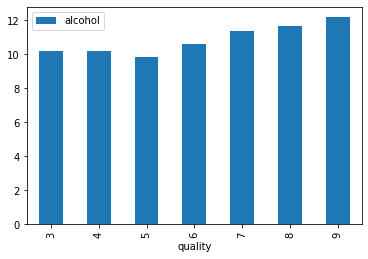

In [9]:
#We can visualize this using a graph
qual_alcohol.plot(kind = "bar")

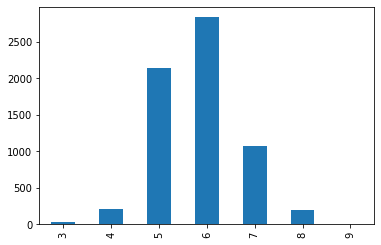

In [10]:
#Given the introduction to the dataset, we know that there are more normal wines than low or high quality wines. We want to plot the distribution of quality of wines to get a better understanding.
data["quality"].value_counts().sort_index().plot(kind="bar")   #Series.values_count()

Therefore we can see that most wines have a quality of 5 and 6. Appears that the distribution has a bell curve.

In [11]:
#Given that most variables are numeric, let see the centre and spread of the variables
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


We can observe that the mean is generally higher than the median, and there is a big difference between 75% and the max, showing the presence of outliers. This is especially so for "residual sugar", "free sulfur dioxide" and "total sulfur dioxide". Let us explore these 3 variables.

In [12]:
#plot boxplot for outliers, do more EDA, correlation analysis, regression analysis

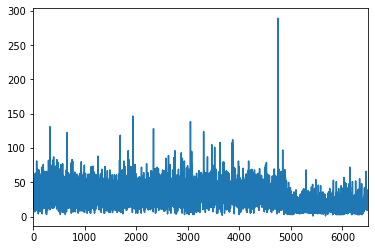

In [13]:
data["free sulfur dioxide"].plot()

We can see that the distribution for "free sulfur dioxide" is pretty even, except for a sudden spike. To make the data more representative, let's remove that data point.

In [14]:
data.loc[data["free sulfur dioxide"]==289]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
4746,6.1,0.26,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white


We can drop this row by using 2 ways:
1. By index
2. By condition eg if it contains a certain value

In [15]:
data.loc[data["free sulfur dioxide"]==289].index

Int64Index([4746], dtype='int64')

In [16]:
#first method
data2 = data.drop(data.index[4746])

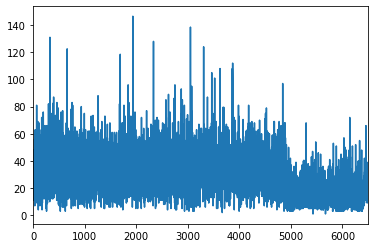

In [17]:
data2["free sulfur dioxide"].plot()

After removing the outlier, we can observe the distribution to be smoother now.

In [18]:
#second method
data3 = data[data["free sulfur dioxide"]!=289]

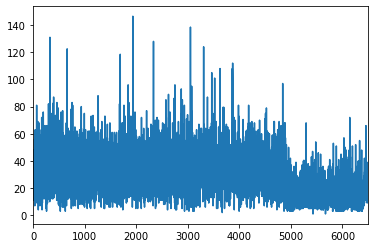

In [19]:
data3["free sulfur dioxide"].plot()

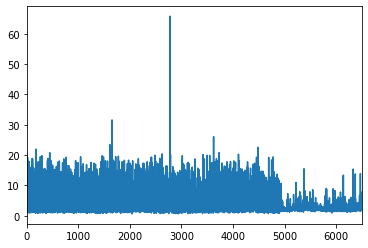

In [20]:
data["residual sugar"].plot()

We can do the same for "residual sugar" and "total sulfur dioxide" columns. Let's use the new dataset data3 as our cleaner dataset with fewer outliers, and compare the results of regression with the original dataset.

In [21]:
data["total sulfur dioxide"].max()
data3 = data3[data3["total sulfur dioxide"]!=440]

In [22]:
data["residual sugar"].max()
data3 = data3[data3["residual sugar"]!=65.8]

Before we do regression, we have to rename the columns of the datasets, as the function does not recognize names with spaces.

In [23]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type'],
      dtype='object')

In [24]:
data.rename(columns={'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid',
                     'residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'},inplace=True)
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type'],
      dtype='object')

In [25]:
data3.rename(columns={'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid',
                     'residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'},inplace=True)
data3.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type'],
      dtype='object')

We are now ready to perform regression on the 2 datasets. We mainly use the 3 previous columns "residual_sugar", "free_sulfur_dioxide", "total_sulfur_dioxide" to test the effect of removing outliers.

In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

reg1 = smf.ols('quality~ residual_sugar + free_sulfur_dioxide + total_sulfur_dioxide', data = data).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     38.93
Date:                Sat, 07 Sep 2019   Prob (F-statistic):           6.32e-25
Time:                        17:04:05   Log-Likelihood:                -8279.9
No. Observations:                6497   AIC:                         1.657e+04
Df Residuals:                    6493   BIC:                         1.659e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.8577 

In [27]:
reg2 = smf.ols('quality~ residual_sugar + free_sulfur_dioxide + total_sulfur_dioxide', data = data3).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     44.77
Date:                Sat, 07 Sep 2019   Prob (F-statistic):           1.25e-28
Time:                        17:04:05   Log-Likelihood:                -8264.5
No. Observations:                6495   AIC:                         1.654e+04
Df Residuals:                    6491   BIC:                         1.656e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.8470 

Thus, we can observe that R square values has improved from 0.018 to 0.020 with the removal of outliers. In addition, with the removal of outliers, residual_sugar becomes much more significant than before. While the R square value has only improved a bit with the removal of outliers, it is likely because of the explaining power of the independent variable itself than removal of outliers being ineffective. While we cannot conclude with statistical significance that removing outliers is effective, it indicates that there is an improvement in model performance.

For the sake of practice, let's use scikit-learn to do modeling now. We shall use Linear Regression, along with a 10-fold cross validation.
- Step 1: import class you want to use
- Step 2: Instantiate the "estimator"
- Step 3: Fit the model with "data"/ Conduct K-fold cross-validation
- Step 4: Using trained model, predict response for out-of-sample data and calculate test accuracy

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

features_col = ["residual_sugar", "free_sulfur_dioxide","total_sulfur_dioxide"]
X = data[features_col]
y = data["quality"]

In [43]:
X.shape, y.shape          #X should have number of observations * no of features, while Y has number of observations

((6497, 3), (6497,))

In [45]:
linreg = LinearRegression()
print(np.sqrt(-cross_val_score(linreg, X, y, cv = 10, scoring = "neg_mean_squared_error")).mean())  

0.8699925332693459


Let's now remove one feature(residual_sugar) and see if performance improves.

In [46]:
features_col2 = ["free_sulfur_dioxide","total_sulfur_dioxide"]
X2 = data[features_col2]
y2 = data["quality"]
print(np.sqrt(-cross_val_score(linreg, X2, y2, cv = 10, scoring = "neg_mean_squared_error")).mean())  

0.8693515569803839


We can observe RMSE reduces with the exclusion of "residual_sugar". This means that we should remove the feature to improve model performance.